### **Downloading Images**

In [4]:
!wget -q https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget -q https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget -q https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png

### **Concatenate Two Images**

In [52]:
def get_con_imgs(img1, img2):
  # det = Image.new('RGB',( img1.width, img2.width, img1.height )) #creating a blank img with width = img1+img2 and height we suppose both have same
  # det.paste(img1, (0, 0)) #places img1 at the top left corner
  # det.paste(img2, (img1.width, 0)) #places img2 next to img1
  # return det
  new_width = img1.width + img2.width
  new_height = max(img1.height, img2.height)

  new_img = Image.new('L', (new_width, new_height))  # 'L' for grayscale
  new_img.paste(img1, (0, 0))  # Left side

  new_img.paste(img2, (img1.width, 0))  # Right side
  return new_img

In [5]:
my_img = "lenna.png"

### **Extract Currunt Working Directory**

In [6]:
import os
cwd = os.getcwd()
cwd

'/content'

In [8]:
img_path = os.path.join(cwd, my_img)
img_path

'/content/lenna.png'

### **Load Images using PILLOW(PIL)**

In [10]:
from PIL import Image
img = Image.open(img_path)
type(img) #Returns the exact class of the image object, which is a format-specific subclass of PIL.Image.Image.

PIL.PngImagePlugin.PngImageFile

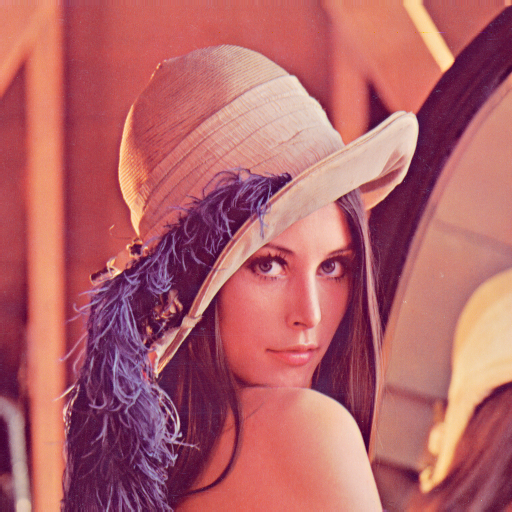

In [11]:
#all functions the same
img
# img.show() ##method using plt
# img.imshow(img) ##method using pyplot

### **Plotting Images**

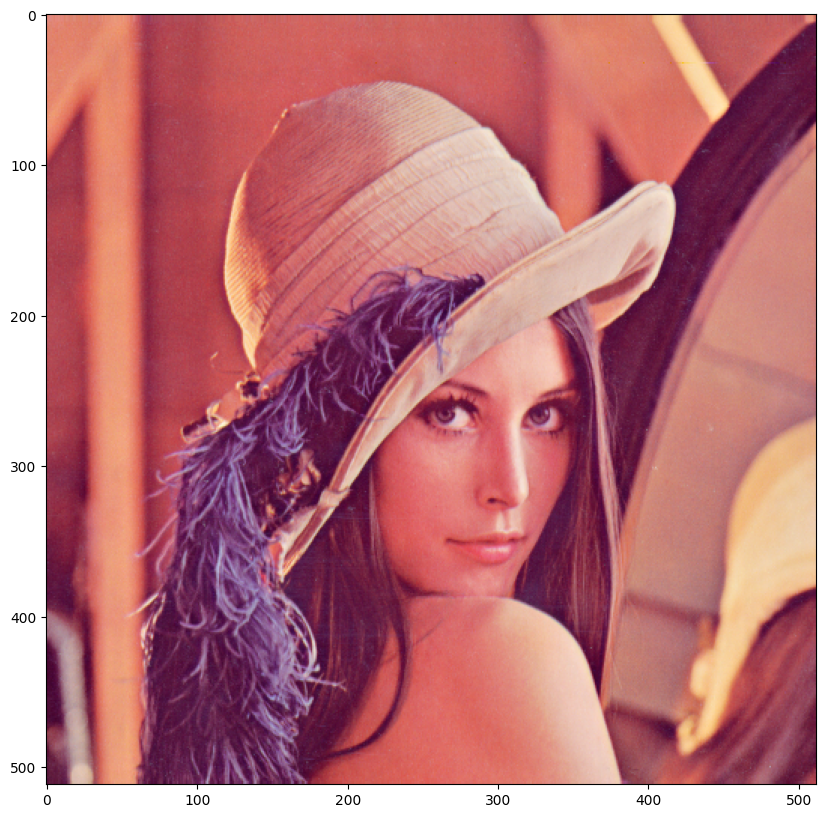

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.imshow(img) #convert img into numpy array and show
plt.show()

In [16]:
print(img.size) #returns (width, height)
#width → Number of pixels in the horizontal direction
#height → Number of pixels in the vertical direction

(512, 512)


In [18]:
print(img.mode) #specifying the pixel

RGB


In [19]:
im = img.load() #load img into memory

In [21]:
# check the intensity of img at xth column and yth row
x = 0
y = 1
im[y,x]
# return RGB intensity

(226, 137, 125)

In [22]:
img.save("lenna.jpg") #saving img in jpg format

### **Grey Scale**

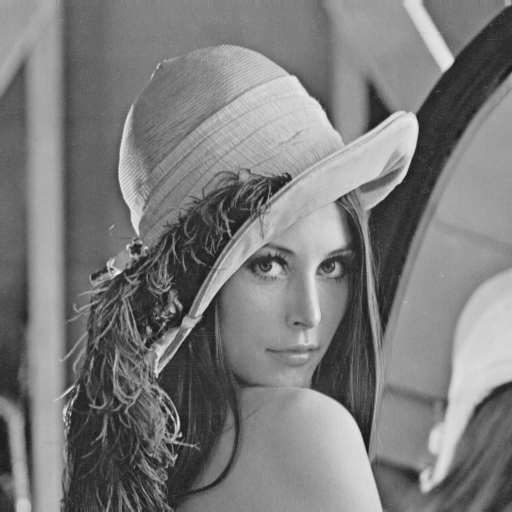

In [32]:
from PIL import ImageOps
img_gray = ImageOps.grayscale(img)
img_gray


In [30]:
img_gray.mode #	Grayscale image (1 channel, 8-bit per pixel)

'L'

### **Quantization**
The Quantization of an image is the number of unique intensity values any given pixel of the image can take. For a grayscale image, this means the number of different shades of gray. Most images have 256 different levels. You can decrease the levels using the method `quantize`. Let's repeatably cut the number of levels in half and observe what happens:

In [33]:
img_gray.quantize(256 // 2)
img_gray.show()

In [47]:
from PIL import Image

def get_con_img(img1, img2):
    # Create new image with width = img1.width + img2.width
    # and height = max of both heights (in case they differ)
    new_width = img1.width + img2.width
    new_height = max(img1.height, img2.height)

    new_img = Image.new('L', (new_width, new_height))  # 'L' for grayscale
    new_img.paste(img1, (0, 0))  # Left side
    new_img.paste(img2, (img1.width, 0))  # Right side
    return new_img

for n in range(3,8):
    plt.figure(figsize=(10,10))

    plt.imshow(get_con_img(img_gray,  img_gray.quantize(256//2**n)))
    plt.title("256 Quantization Levels  left vs {}  Quantization Levels right".format(256//2**n))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

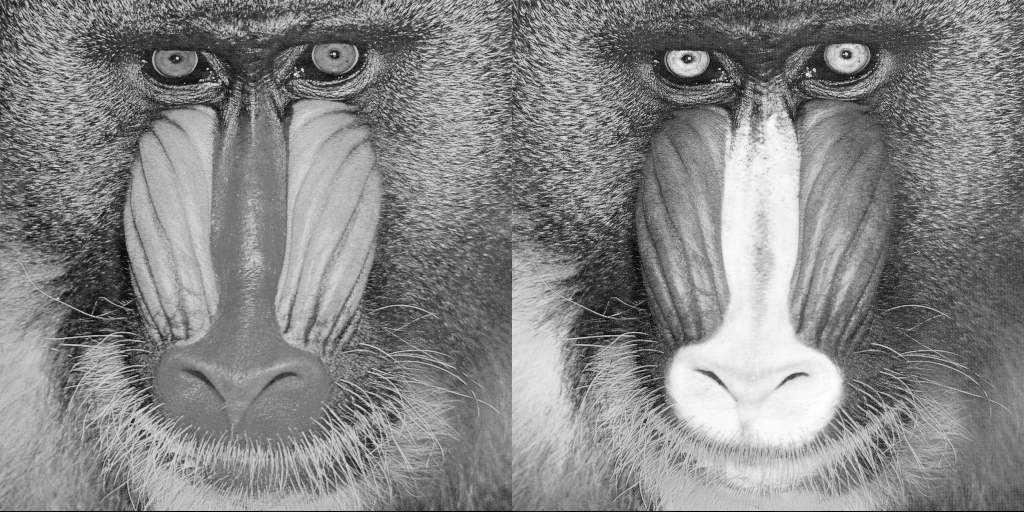

In [61]:
baboon = Image.open("baboon.png")
red, green, blue = baboon.split()
get_con_imgs(baboon, red)

In [64]:
import numpy as np
array = np.asarray(img)# turns the original img into numpy array
print(type(array))
array = np.array(img) # creates a copy first then turns it

<class 'numpy.ndarray'>


In [65]:
# summarize shape
print(array.shape) # (rows, columns, colors)

(512, 512, 3)


In [66]:
print(array)

[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


### **Indexing**

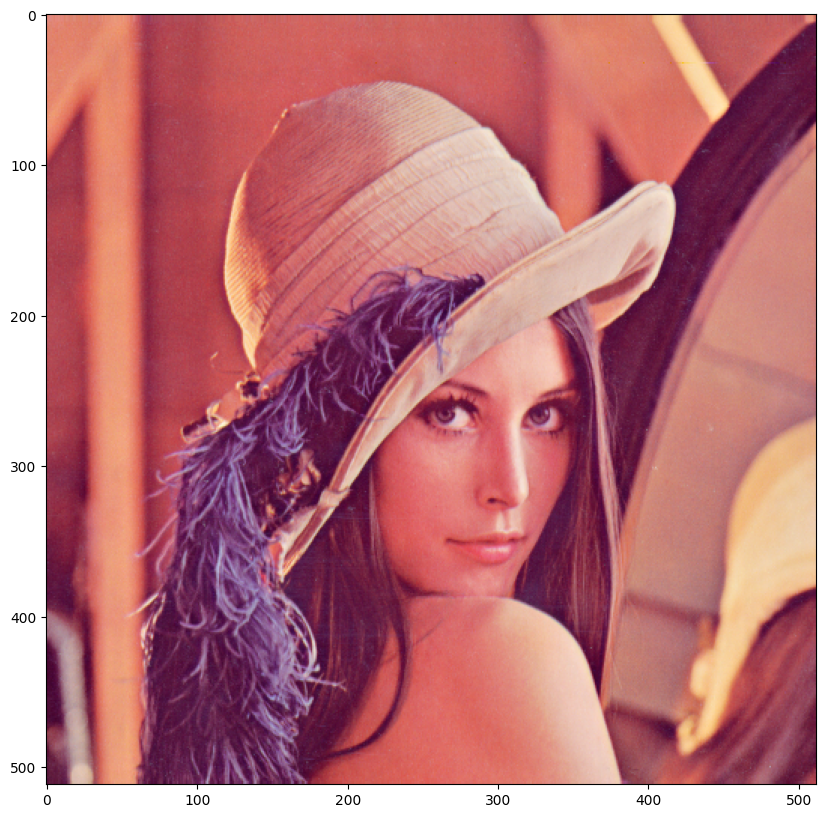

In [67]:
# we can plot array as an image
plt.figure(figsize=(10,10))
plt.imshow(array)
plt.show()

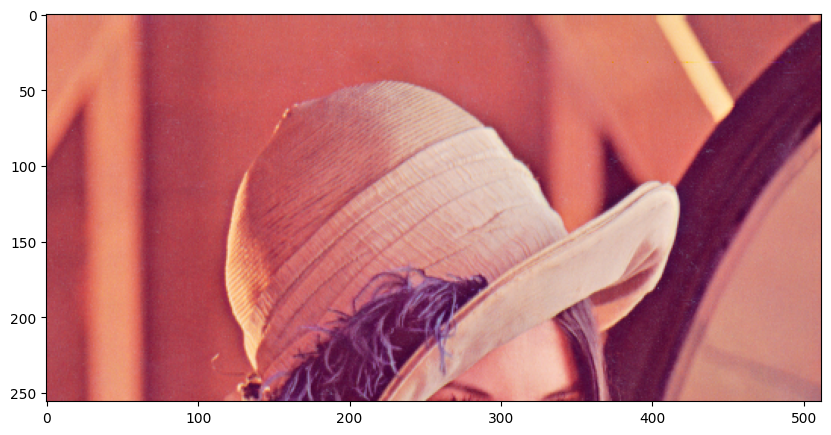

In [68]:
rows = 256
plt.figure(figsize=(10,10))
plt.imshow(array[0:rows,:,:]) #slicing or crop
plt.show()

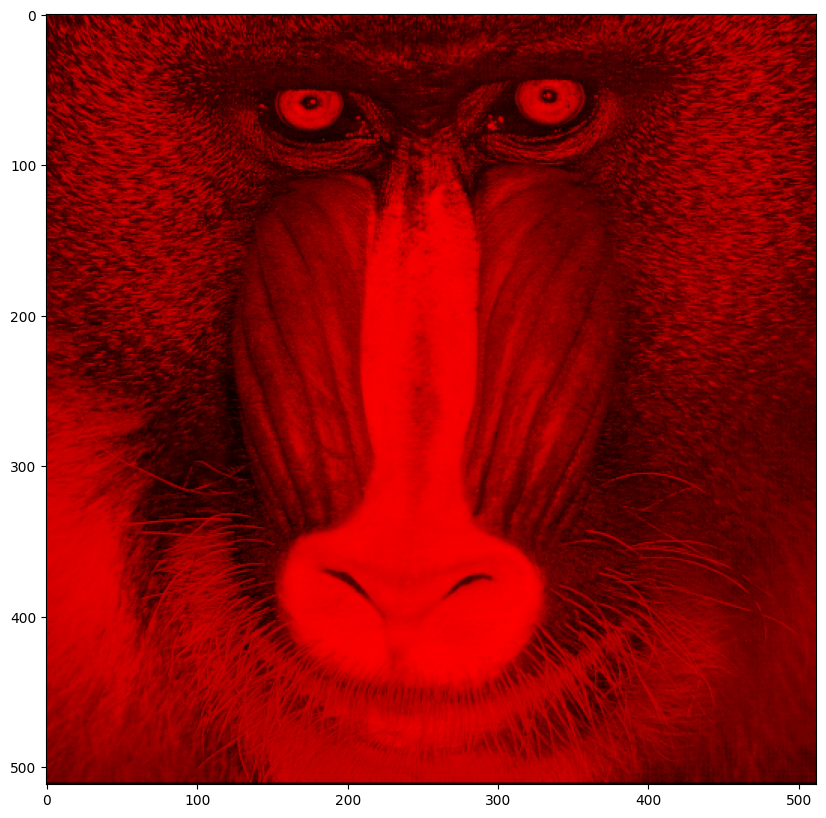

In [69]:
# Or we can create a new array and set all but the red color channels to zero. Therefore, when we display the image it appears red:
baboon_array = np.array(baboon)
baboon_red=baboon_array.copy()
baboon_red[:,:,1] = 0
baboon_red[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_red)
plt.show()